In [1]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

2.1.0


In [5]:
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

print (vggModel.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [2]:

import h5py

def loaddataH5():
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY=np.array(hf.get('trainY'))
        valX=np.array(hf.get('valX'))
        valY=np.array(hf.get('valY'))
        print(trainX.shape,trainY.shape)
        print(valX.shape,valY.shape)
    return trainX,trainY,valX,valY

trainX,trainY,testX,testY=loaddataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [3]:
print(testY)

[ 0  6 10 16  6  7  2  3  4  1 14  7  3  0 13  8  1 14 14  0 15  4  0  5
 13  1  9  8  3 11  9  4 13 12  8  5  5 10 10  7 11 16  4 16 12 11  3  8
  0  7  5 13 14 16  2 12 13  6  3 16  0 13 13  4 10 14  0  8 12  3  9 12
  7  0 10  3 11 16  0 11 11  6  1  5  2  9 10 11  9 11 12 16 15 12  2 16
  3  1 10  6 13  6  8 11  6  8 13  3  7  7  4  8 10  6  2  7  8  0 16  3
 11 13  8 16 12  9  5  3  0 12  1  0 15  7  1  8  2 10  3  5  8  1 13  4
 10  8  5 15  1  7 13  3  5 11  1  2 11  2 16  2  7 11  8  4 12  5 13  2
  3 11 10 13  9 10 10 11  4  8  0  6 12  8 11  7 16  8 15 15 10  6  9 12
 10  8  3 14  2 15 14 12 14  9  6  7  6 12  7  8 14  6  9  1  2  0  4 14
  9  6  0  2 12  7 14 13 11 12  2  1 13  0  7 14  4 10 10 14  4 13 16  1
  4 10 12  0 14 15 15  4  6  2 13  9  9 10 10 13 11 11  5  2  9 14  1  6
  6  8  8  9  8 13  9  8  2 10 14  3  0  9  3 15 16 11  2  1 11  8 10  5
  4  7 12  9  3 12 16 15  6  1 12 14 16  2  0 15  8 13 13  3 13  5  5 10
  7  8 16  7  7 15  5 14  4  2  3 16 15  5  5 11 11

In [12]:
featuresTrain = vggModel.predict(trainX)
trainX_vgg = featuresTrain.reshape(featuresTrain.shape[0], -1)
featuresTest = vggModel.predict(testX)
testX_vgg = featuresTest.reshape(featuresTest.shape[0], -1)



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def logisticreg(trainX, trainY, testX, testY):
    model = LogisticRegression(random_state=0)
    model.fit(trainX, trainY)
    results = model.predict(testX)
    print("Logistic Regression Accuracy:")
    print (metrics.accuracy_score(results, testY))

In [15]:
from sklearn.ensemble import RandomForestClassifier
def randomforest(trainX, trainY, testX, testY):
    model = RandomForestClassifier(200)
    model.fit(trainX, trainY)
    # evaluate the model
    results = model.predict(testX)
    print("Random Forest Accuracy:")
    print (metrics.accuracy_score(results, testY))


In [16]:
logisticreg(trainX_vgg, trainY, testX_vgg, testY)
randomforest(trainX_vgg, trainY, testX_vgg, testY)

Logistic Regression Accuracy:
0.8735294117647059
Random Forest Accuracy:
0.8117647058823529


In [17]:
incepmodel = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

print (incepmodel.summary())

featuresTrain = incepmodel.predict(trainX)
trainX_incep = featuresTrain.reshape(featuresTrain.shape[0], -1)
featuresTest = incepmodel.predict(testX)
testX_incep = featuresTest.reshape(featuresTest.shape[0], -1)


87916544/87910968 [==============================] - 144s 2us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
____________________

In [18]:
logisticreg(trainX_incep, trainY, testX_incep, testY)
randomforest(trainX_incep, trainY, testX_incep, testY)

Logistic Regression Accuracy:
0.85
Random Forest Accuracy:
0.8147058823529412


### Fine tuning

Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - 5s 5ms/sample - loss: 2.7615 - accuracy: 0.1167 - val_loss: 2.4394 - val_accuracy: 0.3000
Epoch 2/100
1020/1020 [==============================] - 4s 4ms/sample - loss: 2.4667 - accuracy: 0.2196 - val_loss: 2.1031 - val_accuracy: 0.3382
Epoch 3/100
1020/1020 [==============================] - 4s 4ms/sample - loss: 2.1703 - accuracy: 0.3108 - val_loss: 1.8082 - val_accuracy: 0.5118
Epoch 4/100
1020/1020 [==============================] - 5s 4ms/sample - loss: 1.9237 - accuracy: 0.3941 - val_loss: 1.5419 - val_accuracy: 0.6000
Epoch 5/100
1020/1020 [==============================] - 4s 4ms/sample - loss: 1.6580 - accuracy: 0.4922 - val_loss: 1.5104 - val_accuracy: 0.4912
Epoch 6/100
1020/1020 [==============================] - 4s 4ms/sample - loss: 1.5607 - accuracy: 0.5176 - val_loss: 1.3365 - val_accuracy: 0.5824
Epoch 7/100
1020/1020 [==============================] - 4s 4ms/sample 

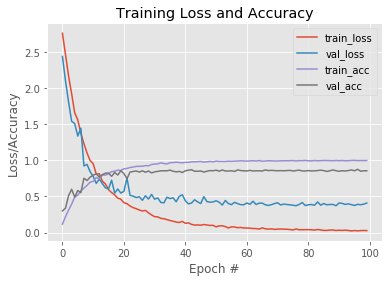

In [11]:

def plot(H):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()
batch_size = 32
NUM_EPOCHS = 100

vggModel.trainable = False
model = tf.keras.models.Sequential()
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))  
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(17, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.01)
fname = "weights.hdf5"
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
H =model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size=batch_size, validation_data=(testX, testY), callbacks=[checkpoint1])

print("Results of Phase A")
plot(H)
       
                      

  ...
    to  
  ['...']
Train for 31 steps, validate on 340 samples
Epoch 1/100
31/31 [==============================] - 9s 289ms/step - loss: 0.4488 - accuracy: 0.8613 - val_loss: 0.3924 - val_accuracy: 0.8588
Epoch 2/100
31/31 [==============================] - 8s 246ms/step - loss: 0.4297 - accuracy: 0.8715 - val_loss: 0.3867 - val_accuracy: 0.8618
Epoch 3/100
31/31 [==============================] - 8s 244ms/step - loss: 0.4294 - accuracy: 0.8725 - val_loss: 0.3832 - val_accuracy: 0.8647
Epoch 4/100
31/31 [==============================] - 8s 243ms/step - loss: 0.4227 - accuracy: 0.8644 - val_loss: 0.3835 - val_accuracy: 0.8647
Epoch 5/100
31/31 [==============================] - 8s 245ms/step - loss: 0.4047 - accuracy: 0.8725 - val_loss: 0.3833 - val_accuracy: 0.8676
Epoch 6/100
31/31 [==============================] - 8s 244ms/step - loss: 0.3870 - accuracy: 0.8755 - val_loss: 0.3871 - val_accuracy: 0.8676
Epoch 7/100
31/31 [==============================] - 8s 243ms/step - loss

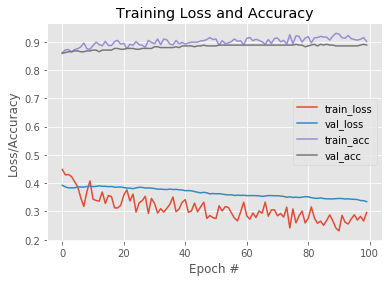

In [17]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=batch_size)


opt = tf.keras.optimizers.SGD(lr=1e-5)
vggModel.trainable = True
trainableFlag = False
# print(len(vggModel.layers))
i=0
for layer in vggModel.layers:
    if i >= 10:
        trainableFlag = True
    layer.trainable = trainableFlag
    i+=1
    
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


H =model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=(testX, testY), 
            steps_per_epoch=len(trainX)// batch_size, verbose =1 )

print("Results of Phase B of fine tuning")

plot(H)

                 